In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [6]:
# Import the datetime module from the datetime library.
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
        
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | bontang
Processing Record 2 of Set 13 | kurilsk
Processing Record 3 of Set 13 | vaini
Processing Record 4 of Set 13 | ushuaia
Processing Record 5 of Set 13 | saint-philippe
Processing Record 6 of Set 13 | cabo san lucas
Processing Record 7 of Set 13 | atuona
Processing Record 8 of Set 13 | bartica
Processing Record 9 of Set 13 | benghazi
Processing Record 10 of Set 13 | mayo
Processing Record 11 of Set 13 | talnakh
Processing Record 12 of Set 13 | garowe
Processing Record 13 of Set 13 | bredasdorp
Processing Record 14 of Set 13 | tasiilaq
Processing Record 15 of Set 13 | port elizabeth
Processing Record 16 of Set 13 | cockburn town
Processing Record 17 of Set 13 | qaanaaq
Processing Record 18 of Set 13 | rio grande
Processing Record 19 of Set 13 | tiksi
Processing Record 20 of Set 13 | hermanus
Processing Record 21 of Set 13 | itaituba
Processing Record 22 of Set 13 | hasaki
Processing Record 23

Processing Record 36 of Set 16 | kalmunai
Processing Record 37 of Set 16 | ponta do sol
Processing Record 38 of Set 16 | pirovskoye
Processing Record 39 of Set 16 | upernavik
Processing Record 40 of Set 16 | marsa matruh
Processing Record 41 of Set 16 | the valley
Processing Record 42 of Set 16 | belaya gora
Processing Record 43 of Set 16 | umm lajj
Processing Record 44 of Set 16 | souillac
Processing Record 45 of Set 16 | turkmenabat
Processing Record 46 of Set 16 | chuy
Processing Record 47 of Set 16 | dingle
Processing Record 48 of Set 16 | sarlat-la-caneda
Processing Record 49 of Set 16 | georgetown
Processing Record 50 of Set 16 | mayor pablo lagerenza
Processing Record 1 of Set 17 | vallenar
Processing Record 2 of Set 17 | coihaique
Processing Record 3 of Set 17 | chiknayakanhalli
Processing Record 4 of Set 17 | alingsas
Processing Record 5 of Set 17 | aloleng
Processing Record 6 of Set 17 | richards bay
Processing Record 7 of Set 17 | port lincoln
Processing Record 8 of Set 17 |

Processing Record 22 of Set 20 | gari
Processing Record 23 of Set 20 | norman wells
Processing Record 24 of Set 20 | mitsamiouli
Processing Record 25 of Set 20 | renqiu
Processing Record 26 of Set 20 | katangli
Processing Record 27 of Set 20 | maumere
Processing Record 28 of Set 20 | poronaysk
Processing Record 29 of Set 20 | barbar
City not found. Skipping...
Processing Record 30 of Set 20 | vestmannaeyjar
Processing Record 31 of Set 20 | miram shah
Processing Record 32 of Set 20 | rockport
Processing Record 33 of Set 20 | dongsheng
Processing Record 34 of Set 20 | vung tau
Processing Record 35 of Set 20 | sur
Processing Record 36 of Set 20 | pochutla
Processing Record 37 of Set 20 | trairi
Processing Record 38 of Set 20 | cururupu
Processing Record 39 of Set 20 | cozumel
Processing Record 40 of Set 20 | nizhnevartovsk
Processing Record 41 of Set 20 | college
Processing Record 42 of Set 20 | kalabo
Processing Record 43 of Set 20 | sorong
Processing Record 44 of Set 20 | alofi
Processi

Processing Record 10 of Set 24 | kavaratti
Processing Record 11 of Set 24 | mangrol
Processing Record 12 of Set 24 | aybak
City not found. Skipping...
Processing Record 13 of Set 24 | birjand
Processing Record 14 of Set 24 | tuy hoa
Processing Record 15 of Set 24 | pacific grove
Processing Record 16 of Set 24 | lalsk
Processing Record 17 of Set 24 | bairnsdale
Processing Record 18 of Set 24 | payakumbuh
Processing Record 19 of Set 24 | harrisonburg
Processing Record 20 of Set 24 | kadoma
Processing Record 21 of Set 24 | brae
Processing Record 22 of Set 24 | korla
Processing Record 23 of Set 24 | galle
Processing Record 24 of Set 24 | sterlibashevo
Processing Record 25 of Set 24 | vilcun
Processing Record 26 of Set 24 | riaba
City not found. Skipping...
Processing Record 27 of Set 24 | half moon bay
Processing Record 28 of Set 24 | sinjar
Processing Record 29 of Set 24 | asau
Processing Record 30 of Set 24 | lompoc
Processing Record 31 of Set 24 | tadine
Processing Record 32 of Set 24 |

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bontang,0.1333,117.5000,81.81,77,100,1.52,ID,2021-02-03 02:20:02
1,Kurilsk,45.2333,147.8833,13.14,87,100,29.42,RU,2021-02-03 02:24:55
2,Vaini,-21.2000,-175.2000,80.60,89,90,6.91,TO,2021-02-03 02:24:55
3,Ushuaia,-54.8000,-68.3000,53.60,71,75,34.52,AR,2021-02-03 02:24:35
4,Saint-Philippe,-21.3585,55.7679,77.00,73,0,5.75,RE,2021-02-03 02:24:55
5,Cabo San Lucas,22.8909,-109.9124,69.80,64,40,8.05,MX,2021-02-03 02:24:56
6,Atuona,-9.8000,-139.0333,78.66,72,48,12.50,PF,2021-02-03 02:23:56
7,Bartica,6.4000,-58.6167,75.20,100,75,9.22,GY,2021-02-03 02:24:56
8,Benghazi,32.1167,20.0667,60.60,72,90,7.20,LY,2021-02-03 02:22:20
9,Mayo,38.8876,-76.5119,33.01,74,90,16.11,US,2021-02-03 02:24:56


In [9]:
#Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bontang,ID,2021-02-03 02:20:02,0.1333,117.5000,81.81,77,100,1.52
1,Kurilsk,RU,2021-02-03 02:24:55,45.2333,147.8833,13.14,87,100,29.42
2,Vaini,TO,2021-02-03 02:24:55,-21.2000,-175.2000,80.60,89,90,6.91
3,Ushuaia,AR,2021-02-03 02:24:35,-54.8000,-68.3000,53.60,71,75,34.52
4,Saint-Philippe,RE,2021-02-03 02:24:55,-21.3585,55.7679,77.00,73,0,5.75
5,Cabo San Lucas,MX,2021-02-03 02:24:56,22.8909,-109.9124,69.80,64,40,8.05
6,Atuona,PF,2021-02-03 02:23:56,-9.8000,-139.0333,78.66,72,48,12.50
7,Bartica,GY,2021-02-03 02:24:56,6.4000,-58.6167,75.20,100,75,9.22
8,Benghazi,LY,2021-02-03 02:22:20,32.1167,20.0667,60.60,72,90,7.20
9,Mayo,US,2021-02-03 02:24:56,38.8876,-76.5119,33.01,74,90,16.11


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

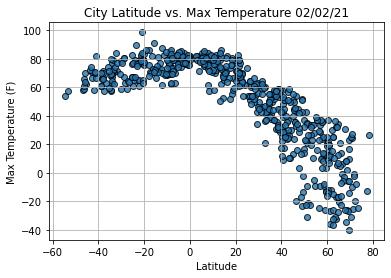

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

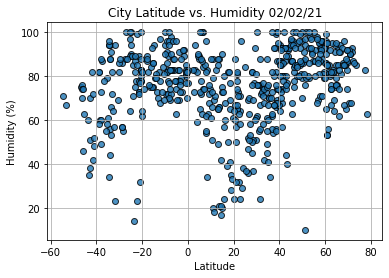

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

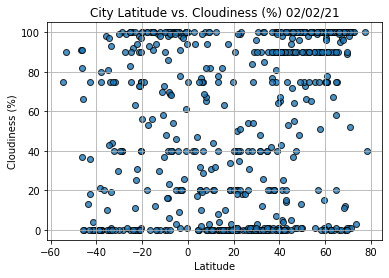

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

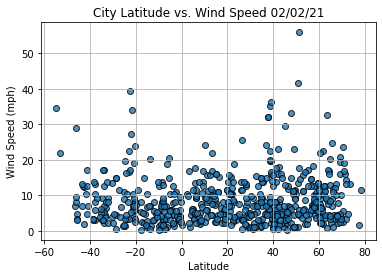

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
index13 = city_data_df.loc[13]
index13

City                     Tasiilaq
Country                        GL
Date          2021-02-03 02:23:59
Lat                       65.6145
Lng                      -37.6368
Max Temp                  21.2000
Humidity                       93
Cloudiness                     90
Wind Speed                 6.9100
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
579    False
580     True
581     True
582     True
583     True
Name: Lat, Length: 584, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bontang,ID,2021-02-03 02:20:02,0.1333,117.5000,81.81,77,100,1.52
1,Kurilsk,RU,2021-02-03 02:24:55,45.2333,147.8833,13.14,87,100,29.42
5,Cabo San Lucas,MX,2021-02-03 02:24:56,22.8909,-109.9124,69.80,64,40,8.05
7,Bartica,GY,2021-02-03 02:24:56,6.4000,-58.6167,75.20,100,75,9.22
8,Benghazi,LY,2021-02-03 02:22:20,32.1167,20.0667,60.60,72,90,7.20
...,...,...,...,...,...,...,...,...,...
578,Turukhansk,RU,2021-02-03 02:26:29,65.8167,87.9833,-6.97,91,99,8.95
580,Isla Mujeres,MX,2021-02-03 02:26:29,21.2311,-86.7310,70.00,82,1,10.25
581,Aykhal,RU,2021-02-03 02:26:29,66.0000,111.5000,-22.76,83,100,10.98
582,Tarko-Sale,RU,2021-02-03 02:26:29,64.9225,77.7850,7.12,95,90,8.46


In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bontang,ID,2021-02-03 02:20:02,0.1333,117.5000,81.81,77,100,1.52
1,Kurilsk,RU,2021-02-03 02:24:55,45.2333,147.8833,13.14,87,100,29.42
5,Cabo San Lucas,MX,2021-02-03 02:24:56,22.8909,-109.9124,69.80,64,40,8.05
7,Bartica,GY,2021-02-03 02:24:56,6.4000,-58.6167,75.20,100,75,9.22
8,Benghazi,LY,2021-02-03 02:22:20,32.1167,20.0667,60.60,72,90,7.20


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

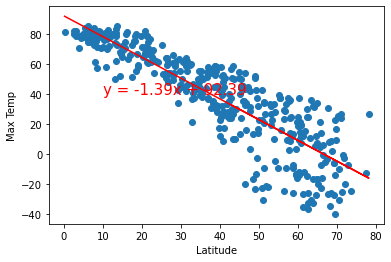

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

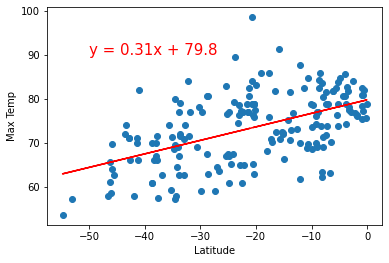

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

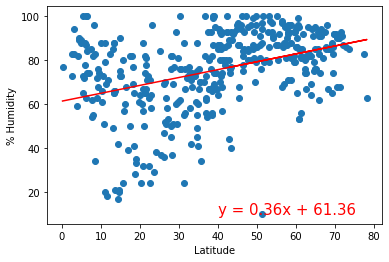

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

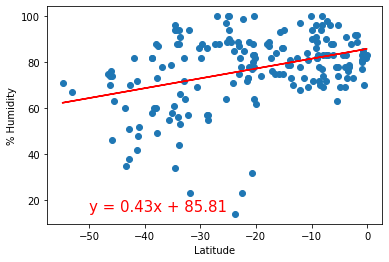

In [29]:
#Linear regression on the Southern Hemisphere (Humidity)
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity', (-50,15))

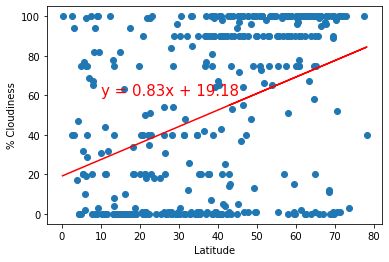

In [30]:
#Linear regression on the Northern Hemisphere (Cloudiness)
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness', (10,60))

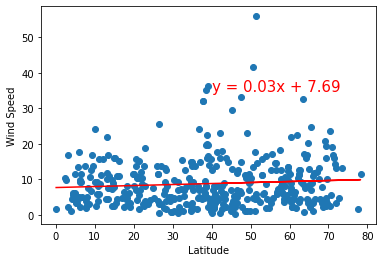

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: EOL while scanning string literal (<ipython-input-33-8c4f0e57bb27>, line 6)